<a href="https://colab.research.google.com/github/Slzl/Logistic-Regression/blob/main/Bike_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/bike_dataset[1].csv')

In [187]:
df.shape

(361, 11)

In [188]:
df.head()

,model_name,price,CC,mileage,weight_in_kg,links,acceleration_speed,top_speed,type_of_bike_Electric Bike,type_of_bike_Petrol Bike,price_bin
0,Gravton Motors Quanta,99000,113.26,320.0,100,https://www.carandbike.com/gravton-motors-bike...,4.20,70.0,0,1,Low
1,Simple Energy One,109999,131.64,236.0,110,https://www.carandbike.com/simple-energy-bikes...,3.60,100.0,0,1,Moderate
2,Okaya Classiq,69900,108.50,200.0,95,https://www.carandbike.com/okaya-bikes/classiq,6.64,25.0,0,1,Low
3,Oben Electric Rorr,102999,131.64,200.0,120,https://www.carandbike.com/oben-electric-bikes...,3.00,100.0,0,1,Moderate
4,Ola Electric S1,85099,201.92,181.0,121,https://www.carandbike.com/ola-electric-bikes/s1,2.90,116.0,0,1,Low


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   model_name                  361 non-null    object  
 1   price                       361 non-null    int64   
 2   CC                          361 non-null    float64 
 3   mileage                     361 non-null    float64 
 4   weight_in_kg                361 non-null    int64   
 5   links                       361 non-null    object  
 6   acceleration_speed          361 non-null    float64 
 7   top_speed                   361 non-null    float64 
 8   type_of_bike_Electric Bike  361 non-null    int64   
 9   type_of_bike_Petrol Bike    361 non-null    int64   
 10  price_bin                   360 non-null    category
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 28.9+ KB


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df= df.copy()

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
df[['CC', 'acceleration_speed', 'top_speed']] = imputer.fit_transform(df[['CC', 'acceleration_speed', 'top_speed']])

In [ ]:
df.isnull().sum()

model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f350bb64790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f350bb64d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f350bb644c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f350bb76340>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f350bb76610>,
 'means': []}

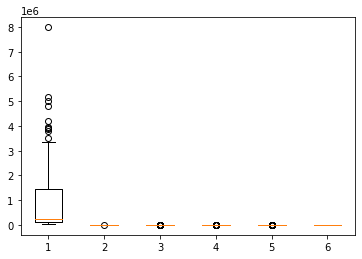

In [ ]:
plt.boxplot([df['price'], df['CC'], df['mileage'], df['weight_in_kg'], df['acceleration_speed'], df['top_speed']])

In [ ]:
plt.show()

In [ ]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.5)
q3 = df['price'].quantile(0.75)

In [ ]:
bin_edges = [df['price'].min(), q1, q2, q3, df['price'].max()]

In [ ]:
bin_labels = ['Low', 'Moderate', 'High', 'Very high']

In [ ]:
df['price_bin'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels)

In [ ]:
print(df.head())

              model_name   price      CC  mileage  weight_in_kg  \
0  Gravton Motors Quanta   99000  113.26    320.0           100   
1      Simple Energy One  109999  131.64    236.0           110   
2          Okaya Classiq   69900  108.50    200.0            95   
3     Oben Electric Rorr  102999  131.64    200.0           120   
4        Ola Electric S1   85099  201.92    181.0           121   

                                               links  acceleration_speed  \
0  https://www.carandbike.com/gravton-motors-bike...                4.20   
1  https://www.carandbike.com/simple-energy-bikes...                3.60   
2     https://www.carandbike.com/okaya-bikes/classiq                6.64   
3  https://www.carandbike.com/oben-electric-bikes...                3.00   
4   https://www.carandbike.com/ola-electric-bikes/s1                2.90   

   top_speed  type_of_bike_Electric Bike  type_of_bike_Petrol Bike price_bin  
0       70.0                         1.0                     

In [ ]:
df.describe()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed,type_of_bike_Electric Bike,type_of_bike_Petrol Bike
count,3.610000e+02,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,8.399079e+05,591.857285,44.681413,178.839335,3.546061,124.626055,0.157895,0.842105
std,1.052083e+06,543.220237,39.890270,73.839516,2.106613,40.857865,0.365148,0.365148
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000,0.000000,0.000000
25%,1.000000e+05,124.700000,20.000000,118.000000,2.258000,93.840000,0.000000,1.000000
50%,2.420000e+05,312.200000,30.000000,169.000000,2.300000,141.200000,0.000000,1.000000
75%,1.459000e+06,998.000000,55.000000,216.000000,4.000000,156.200000,0.000000,1.000000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000,1.000000,1.000000


In [ ]:
bins = [0, 50, 100, 150, 200, 300, 400, 500, 750, 1000, 2000, 3000]
labels = ['<=50', '51-100', '101-150', '151-200', '201-300', '301-400', '401-500', '501-750', '751-1000', '1001-2000', '>2000']

In [ ]:
df['CC_bin'] = pd.cut(df['CC'], bins=bins, labels=labels)

In [ ]:
df['type_of_bike_Electric Bike'] = df['CC_bin'].apply(lambda x: 1 if x == '<=50' else 0)
df['type_of_bike_Petrol Bike'] = df['CC_bin'].apply(lambda x: 1 if x != '<=50' else 0)

In [ ]:
df.drop('CC_bin', axis=1, inplace=True)

In [ ]:
print(df.describe())

              price           CC     mileage  weight_in_kg  \
count  3.610000e+02   361.000000  361.000000    361.000000   
mean   8.399079e+05   591.857285   44.681413    178.839335   
std    1.052083e+06   543.220237   39.890270     73.839516   
min    3.800000e+04    87.800000    8.000000     55.000000   
25%    1.000000e+05   124.700000   20.000000    118.000000   
50%    2.420000e+05   312.200000   30.000000    169.000000   
75%    1.459000e+06   998.000000   55.000000    216.000000   
max    7.990000e+06  2458.000000  320.000000    433.000000   

       acceleration_speed   top_speed  type_of_bike_Electric Bike  \
count          361.000000  361.000000                       361.0   
mean             3.546061  124.626055                         0.0   
std              2.106613   40.857865                         0.0   
min              1.010000   25.000000                         0.0   
25%              2.258000   93.840000                         0.0   
50%              2.300000  

In [ ]:
df.corr()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed,type_of_bike_Electric Bike,type_of_bike_Petrol Bike
price,1.000000,0.831619,-0.481968,0.771784,-0.435491,0.552568,NaN,NaN
CC,0.831619,1.000000,-0.563012,0.916550,-0.526056,0.661495,NaN,NaN
mileage,-0.481968,-0.563012,1.000000,-0.582938,0.519110,-0.685001,NaN,NaN
weight_in_kg,0.771784,0.916550,-0.582938,1.000000,-0.612416,0.726739,NaN,NaN
acceleration_speed,-0.435491,-0.526056,0.519110,-0.612416,1.000000,-0.826845,NaN,NaN
top_speed,0.552568,0.661495,-0.685001,0.726739,-0.826845,1.000000,NaN,NaN
type_of_bike_Electric Bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_bike_Petrol Bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
predictors = df[['CC', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']]
corr_matrix = predictors.corr()
print(corr_matrix)

                          CC   mileage  weight_in_kg  acceleration_speed  \
CC                  1.000000 -0.563012      0.916550           -0.526056   
mileage            -0.563012  1.000000     -0.582938            0.519110   
weight_in_kg        0.916550 -0.582938      1.000000           -0.612416   
acceleration_speed -0.526056  0.519110     -0.612416            1.000000   
top_speed           0.661495 -0.685001      0.726739           -0.826845   

                    top_speed  
CC                   0.661495  
mileage             -0.685001  
weight_in_kg         0.726739  
acceleration_speed  -0.826845  
top_speed            1.000000  


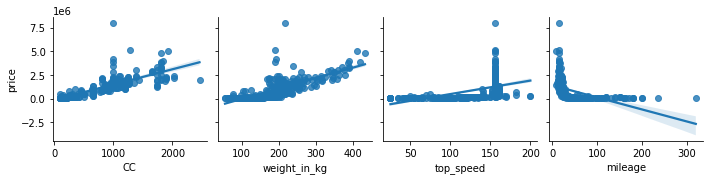

In [ ]:
import seaborn as sns
sns.pairplot(df, x_vars=[ 'CC',  'weight_in_kg','top_speed','mileage'], y_vars='price', kind='reg')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['CC','weight_in_kg', 'top_speed', 'mileage']]
y = df['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [172]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [173]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [175]:
models = []
models.append(RandomForestClassifier(n_estimators=50, random_state=1))
models.append(RandomForestClassifier(n_estimators=100, random_state=1))
models.append(RandomForestClassifier(n_estimators=150, random_state=1))

In [176]:
predictions = []
for model in models:
    model.fit(X_train, y_train)
    predictions.append(model.predict(X_test))

In [177]:
ensemble_preds = np.mean(predictions, axis=0)

In [184]:
accuracy = np.mean(ensemble_preds == y_test)

In [185]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [181]:
y_pred = logreg.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.905
Confusion matrix:
 [[89  8]
 [14 89]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        97
           1       0.92      0.86      0.89       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

